#### Setup

In [48]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('heart-disease.csv')
X = df.drop('target', axis=1)
y = df['target']

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#### 1. Compare the performance of a kNN with k = 5 and a Naïve Bayes with Gaussian assumption (consider all remaining parameters as default):

> a. Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.

Scaled kNN Accuracy: 0.654
Scaled Naive Bayes Accuracy: 0.835


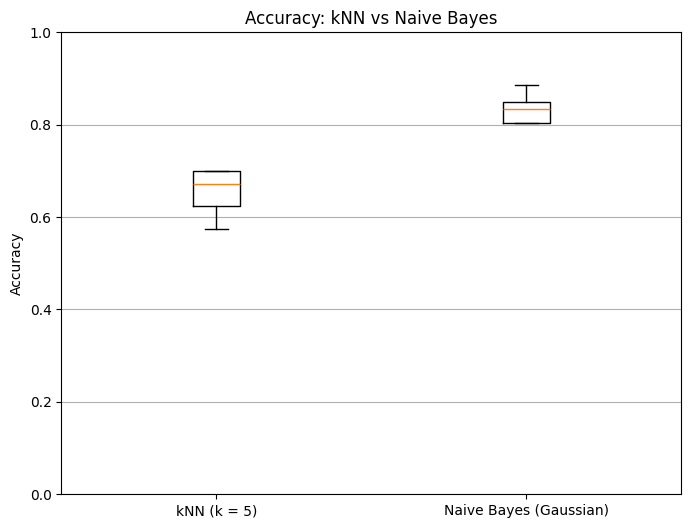

In [49]:
## Classify the data set using kNN and Naive Bayes
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

## Evaluate by cross-validation
knn_scores = cross_val_score(knn, X, y, cv=folds)
nb_scores = cross_val_score(nb, X, y, cv=folds)

print(f"Scaled kNN Accuracy: {knn_scores.mean():.3f}")
print(f"Scaled Naive Bayes Accuracy: {nb_scores.mean():.3f}")

# Plot the figure
plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores, nb_scores], labels = ['kNN (k = 5)', 'Naive Bayes (Gaussian)'] )
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Accuracy: kNN vs Naive Bayes')
plt.grid(axis = 'y')
plt.show()

The Naïve Bayes Gaussian model appears to be more stable when it comes to accuracy compared to the kNN model. This might be because of the high-dimensionality of the data set (13 features). 

The kNN model is distance-based, which means it relies on distance between data points to identify the relationship between them and patterns in the data. For high-dimensional spaces, the data becomes too sparse and the distance between instances more insignificant, as they all become very far from one another. Therefore, the kNN model struggles to find “closeness” between data instances and suffers in accuracy scores.

On the other hand, by assuming independence between features, the Naïve Bayes model becomes simpler and may generalize better, leading to similar accuracies across all folds.

> b. Report the accuracy of both models, this time scaling the data with a Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an explanation for the results.

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

X_scaled = MinMaxScaler().fit_transform(X)

knn_scaled_scores = cross_val_score(knn, X_scaled, y, cv=folds)
nb_scaled_scores = cross_val_score(nb, X_scaled, y, cv=folds)

print(f"Scaled kNN Accuracy: {knn_scaled_scores.mean():.3f}")
print(f"Scaled Naive Bayes Accuracy: {nb_scaled_scores.mean():.3f}")

Scaled kNN Accuracy: 0.822
Scaled Naive Bayes Accuracy: 0.835


sdaiasdoisadiuhsa

> c. Using scipy, test the hypothesis “the kNN model is statistically superior to Naïve Bayes regarding accuracy”, asserting whether it is true.

In [51]:
# Perform a paired t-test
t_stat, p_val = stats.ttest_rel(knn_scores, nb_scores, alternative = 'greater');
alpha = 0.05

# Print the results
if p_val < alpha:
    print(p_val, "<", alpha)
    print("Reject the null hypothesis")
    print("kNN is statistcally superior to Naive Bayes regarding accuracy")
else:
    print(p_val, ">=", alpha)
    print("Fail to reject the null hypothesis")
    print("kNN is not statistcally superior to Naive Bayes regarding accuracy")

0.9987020187220139 >= 0.05
Fail to reject the null hypothesis
kNN is not statistcally superior to Naive Bayes regarding accuracy


#### 2. Using a 80-20 train-test split, vary the number of neighbors of a kNN classifier using k = {1, 5, 10, 20, 30}. Additionally, for each, train one classifier using uniform weights and distance weights.

> a.  Plot the train and test accuracy for each model.

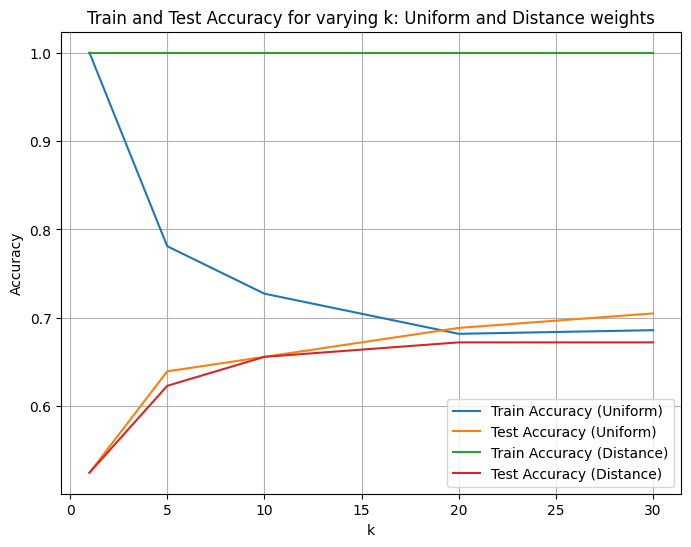

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

k_values = [1, 5, 10, 20, 30]

train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

# Train and test the model for different k values
for k in k_values:
    # Train and test the model for uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    train_acc_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
    test_acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))
    
    train_accuracies_uniform.append(train_acc_uniform)
    test_accuracies_uniform.append(test_acc_uniform)
    
    # Train and test the model for distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    train_acc_distance = accuracy_score(y_train, knn_distance.predict(X_train))
    test_acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))
    
    train_accuracies_distance.append(train_acc_distance)
    test_accuracies_distance.append(test_acc_distance)


#Plot the figure
plt.figure(figsize=(8, 6))

plt.plot(k_values, train_accuracies_uniform, label='Train Accuracy (Uniform)')
plt.plot(k_values, test_accuracies_uniform, label='Test Accuracy (Uniform)')
plt.plot(k_values, train_accuracies_distance, label='Train Accuracy (Distance)')
plt.plot(k_values, test_accuracies_distance, label='Test Accuracy (Distance)')

plt.title('Train and Test Accuracy for varying k: Uniform and Distance weights')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()    

> b. Explain the impact of increasing the neighbors on the generalization ability of the models. 

By increasing the number of neighbors in aa kNN model, it becomes a better at generalization. This is true because we look at a bigger portion of the population when deciding the output value of a point, instead of just the few closest points. Therefore, the model gets a better view of the data and patterns instead of focusing just on smaller areas and most probably catching noise during training.

The results confirm this hypothesis. We can see that for smaller values of k in the graph, the accuracy of the uniform weights training is very high, opposed to the small scores in the corresponding uniform weights test. The model is suffering from overfitting caused by the noise caught associated with only looking at the few closest neighbors. As we increase the k value, the test accuracy increases 
proving the also increasing generalization capability of the model.


#### 3. Considering the unique properties of the heart-disease.csv dataset, identify two possible difficulties of the Naïve Bayes model used in the previous exercises when learning from the given dataset

First, when we use Naïve Bayes we are assuming that all variables are independent from each other , which may not be true for our specific datatset. For example, features such as "cholesterol in mg/d", "resting blood pressure" and "age" are often not independent, as age is usually correlated with both these features. Ignoring this correlation may lead to misjudges by our model. For instance, high cholesterol and high blood pressure together could be stronger indicators of heart disease than when analyzed independently, something that Naïve Bayes wouldn't be able to catch.

Secondly, with Naïve Bayes we assume that all features are equally important, which may not reflect reality. Certain features, such as "chest pain" or "maximum heart rate achieved" may hold more predictive weight than "resting electrocardiographic results", when it comes to diagnose a heart disease.